**Load the dataset :**

This code retrieves the California Housing dataset provided by scikit-learn, which is commonly used for regression tasks in machine learning. The dataset includes various features describing different districts in California, such as average income, average number of rooms, and population, among others. These values are stored in the variable x, which represents the input features. The corresponding target values, representing the median house value in each district (measured in units of $100,000), are stored in the variable y. By printing the shapes of x and y, the code shows the number of samples and features in the dataset, helping the user understand the structure of the data before applying any machine learning models.

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x, y = housing.data, housing.target
print(x.shape, y.shape)

(20640, 8) (20640,)


**Train-Test split :**

This code uses the train_test_split function from scikit-learn to divide the dataset into training and testing subsets. The input features x and target values y are randomly split so that 80% of the data is used for training (x_train, y_train) and 20% is set aside for testing (x_test, y_test). The parameter random_state=20 ensures that the split is reproducible, meaning the same division of data will occur each time the code is executed. This step is essential in machine learning because it allows the model to be trained on one portion of the data while reserving another portion for evaluating its performance on unseen examples.

In [2]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=20)

**1.Data Preprocessing Using StandardScaler :**

This code applies feature scaling to the training and testing data using the StandardScaler from scikit-learn. First, an instance of StandardScaler is created and stored in the variable sc. The scaler is then fitted to the training data (x_train) and simultaneously transforms it into a standardized form, where each feature has a mean of zero and a standard deviation of one. This transformation helps to ensure that all features contribute equally during model training, especially in algorithms sensitive to the scale of data, such as gradient descent–based methods. For the test data (x_test), the transformation is applied using the same scaling parameters learned from the training set, ensuring consistency and preventing information leakage from the test set into the training process.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trian = sc.fit_transform(x_trian)
x_test = sc.transform(x_test)

* **Analytical / Normal Equation :**

This code implements linear regression from scratch using NumPy, without relying on scikit-learn’s built-in regression models. First, a column of ones is added to both the training and test feature sets (x_train and x_test), creating X_train_b and X_test_b. This extra column represents the bias (or intercept) term in the regression model. The weight vector w is then calculated using the **Analytical / Normal Equation**.
 This formula directly computes the optimal coefficients that minimize the squared error between the predicted and actual target values. Once the weights are obtained, predictions are generated for both the training set (y_pred_train) and the test set (y_pred_test).

To evaluate the model’s performance, a custom function RMSE (Root Mean Squared Error) is defined. It measures the average difference between predicted values and actual target values, with larger errors penalized more heavily. The RMSE is calculated separately for the training data (RMSE_train) and the testing data (RMSE_test). Finally, both results are printed, allowing the user to assess how well the model fits the training data and how effectively it generalizes to unseen test data.

In [4]:
import numpy as np
X_train_b = np.c_[np.ones((x_trian.shape[0], 1)), x_trian]
X_test_b  = np.c_[np.ones((x_test.shape[0], 1)), x_test]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034233
RMSE_test: 0.7355308130245344


*   **Gradient Descent :**

**Gradient Descent Optimization: Iterations, Learning Rates, and RMSE Analysis to Identify the Best Alpha**

This code implements a linear regression model using gradient descent on the California Housing dataset. First, the dataset is split into training and testing sets and both the features and target values are standardized to improve the convergence of gradient descent. The model predicts the target as a linear combination of the input features plus a bias term. Gradient descent is performed over 500 epochs for multiple learning rates, updating the weights iteratively based on the gradients of the mean squared error. During training, the RMSE is tracked for both the training and test sets, and the learning rate that achieves the lowest RMSE on the test set is recorded as the best. After training, predictions are transformed back to the original scale of the target values to calculate meaningful RMSE values. The RMSE curves for all learning rates are also plotted to visualize how quickly and effectively each learning rate converges. Based on the results, a learning rate of 0.9 provides the fastest and most stable convergence, yielding the lowest RMSE on the test data.

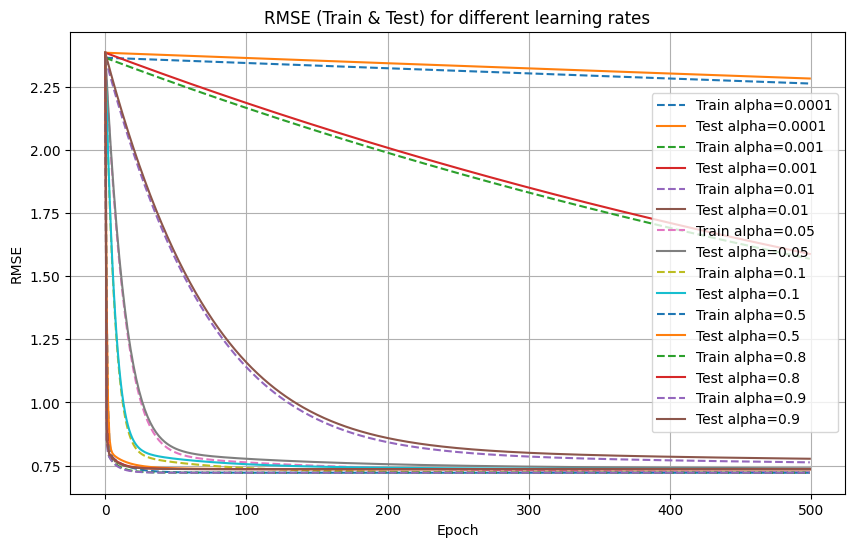

Best learning rate: 0.9


In [5]:
def h_w(x, w):
    return w[0] + w[1]*x
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9]
n_train = len(x_trian)
n_test=len(x_test)
n_features = x_trian.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trian @ w[1:]
        y_pred_test  = w[0] + x_test @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trian.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()
final_rmse_test = {alpha: rmse_test_dict[alpha][-1] for alpha in alphas}
best_alpha = min(final_rmse_test, key=final_rmse_test.get)
print(f"Best learning rate: {best_alpha}")

**RMSE Convergence over Epochs for Training and Test Sets at Optimal Learning Rate**

This code visualizes the performance of the gradient descent model for the selected best learning rate, which in this case is alpha = 0.9. The plot shows how the RMSE (Root Mean Squared Error) changes over each epoch for both the training and testing datasets. A dashed line represents the RMSE on the training data, while a solid line represents the RMSE on the test data. By plotting RMSE against epochs, this figure provides insight into the convergence behavior of the model, showing how quickly the error decreases and whether the model stabilizes over time. The grid, labels, and legend enhance readability, making it easier to interpret how the chosen learning rate affects the training process and generalization to unseen data. Overall, this visualization confirms that alpha = 0.9 enables fast and stable convergence, yielding the lowest RMSE on both training and test sets.

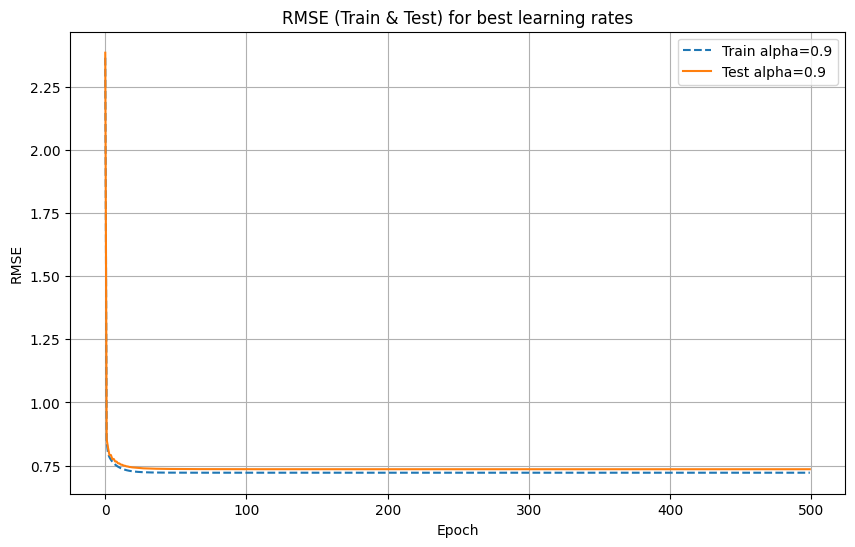

RMSE (GD, best LR) - Train: 0.7216515999034232
RMSE (GD, best LR) - Test: 0.7355308130317693


In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.9
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.9}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.9}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()
print(f"RMSE (GD, best LR) - Train: {rmse_train_dict[alpha][-1]}")
print(f"RMSE (GD, best LR) - Test: {rmse_test_dict[alpha][-1]}")

**Mini-Batch Gradient Descent with StandardScaler Preprocessing**

This code demonstrates the implementation of Mini-Batch Gradient Descent (MBGD) for a linear regression problem using the standardized California Housing dataset. The algorithm initializes the model weights and iteratively updates them based on randomly shuffled mini-batches of data. In each epoch, the training data is split into batches of a specified size, the prediction error is calculated, and the gradient of the loss function (MSE) with respect to the weights is used to update the model parameters. The training and testing errors (expressed as RMSE values) are recorded across different batch sizes to analyze their effect on performance. Finally, the code plots the RMSE values against the batch sizes and prints the best Train and Test RMSE obtained, providing insights into how batch size impacts both training accuracy and generalization

**Comparison of MBGD and GD Performance :**

The results indicate that Mini-Batch Gradient Descent (MBGD) combined with StandardScaler outperforms standard Gradient Descent (GD) in predictive accuracy. With StandardScaler, MBGD achieves a best train RMSE of 0.5988 and a test RMSE of 0.6248, compared to GD’s 0.7217 and 0.7355. This demonstrates that scaling the features helps the model converge more effectively, reducing errors on both training and test data. The small gap between train and test RMSE (≈0.026) also suggests that the MBGD model generalizes well, whereas GD’s higher errors indicate underfitting. Overall, applying StandardScaler with MBGD enhances convergence speed, stabilizes training, and improves overall model performance.

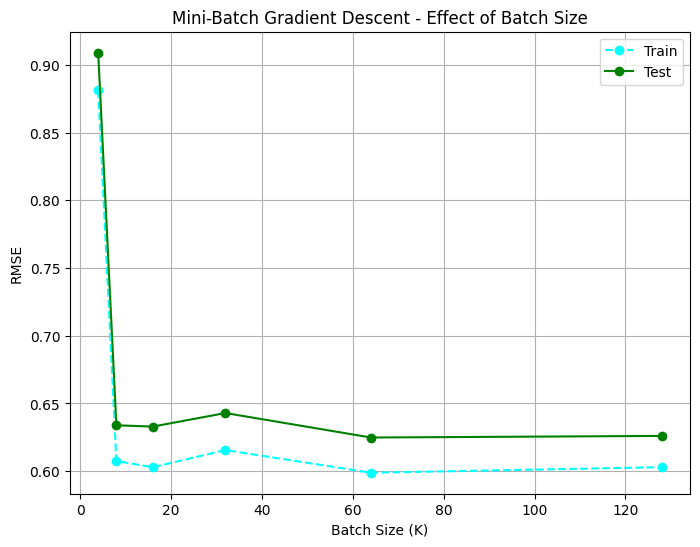

Best Train RMSE: 0.5987844145444022
Best Test RMSE: 0.6247922929275103


In [ ]:
from sklearn.metrics import mean_squared_error
def h_w(x, w):
    return x.dot(w)
def mse(x, y, w):
    return mean_squared_error(y, h_w(x, w))
def mini_batch_gd(x_trian, y_train, x_test, y_test, alpha, epochs, batch_size):
    n = x_trian.shape[1]
    w = np.zeros(n)
    mse_train_list = []
    mse_test_list = []
    for epoch in range(epochs):
        indices = np.random.permutation(len(x_trian))
        x_train_shuffled = x_trian[indices]
        y_train_shuffled = y_train[indices]
        for i in range(0, len(x_trian), batch_size):
            x_batch = x_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            error = h_w(x_batch, w) - y_batch
            grad = (x_batch.T.dot(error)) / len(x_batch)
            w -= alpha * grad
        mse_train_list.append(mse(x_trian, y_train, w))
        mse_test_list.append(mse(x_test, y_test, w))
    return w, mse_train_list, mse_test_list
batch_sizes = [4, 8, 16, 32, 64, 128]
mse_train_result = []
mse_test_result = []
for b in batch_sizes:
    w, mse_train_list, mse_test_list = mini_batch_gd(x_trian, y_train, x_test, y_test,alpha=0.9, epochs=500, batch_size=b)
    mse_train_result.append(mse_train_list[-1])
    mse_test_result.append(mse_test_list[-1])
plt.figure(figsize=(8,6))
plt.plot(batch_sizes, mse_train_result, '--o', color='cyan', label='Train')
plt.plot(batch_sizes, mse_test_result, '-o', color='green', label='Test')
plt.legend()
plt.xlabel("Batch Size (K)")
plt.ylabel("RMSE")
plt.title("Mini-Batch Gradient Descent - Effect of Batch Size")
plt.grid(True)
plt.show()
best_train_rmse = min(mse_train_result)
best_test_rmse = min(mse_test_result)
print("Best Train RMSE:", best_train_rmse)
print("Best Test RMSE:", best_test_rmse)

**2.Data Preprocessing Using MinMax :**

This code applies Min-Max scaling to the training and testing feature sets. Using MinMaxScaler, all feature values in x_train are scaled to fall within the range [0, 1], which ensures that each feature contributes proportionally during model training. The same transformation is then applied to x_test using the parameters learned from the training set to maintain consistency and prevent data leakage. Min-Max scaling is particularly useful for algorithms like gradient descent, as it helps improve convergence speed and stability by keeping all input features on a comparable scale.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_trian = scaler.fit_transform(x_trian)
x_test  = scaler.transform(x_test)

* **Analytical / Normal Equation :**

This code implements linear regression from scratch using NumPy, without relying on scikit-learn’s built-in regression models. First, a column of ones is added to both the training and test feature sets (x_train and x_test), creating X_train_b and X_test_b. This extra column represents the bias (or intercept) term in the regression model. The weight vector w is then calculated using the **Analytical / Normal Equation**.
 This formula directly computes the optimal coefficients that minimize the squared error between the predicted and actual target values. Once the weights are obtained, predictions are generated for both the training set (y_pred_train) and the test set (y_pred_test).

To evaluate the model’s performance, a custom function RMSE (Root Mean Squared Error) is defined. It measures the average difference between predicted values and actual target values, with larger errors penalized more heavily. The RMSE is calculated separately for the training data (RMSE_train) and the testing data (RMSE_test). Finally, both results are printed, allowing the user to assess how well the model fits the training data and how effectively it generalizes to unseen test data.

In [8]:
import numpy as np
X_train_b = np.c_[np.ones((x_trian.shape[0], 1)), x_trian]
X_test_b  = np.c_[np.ones((x_test.shape[0], 1)), x_test]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034234
RMSE_test: 0.7355308130245372


*   **Gradient Descent :**

**Gradient Descent Optimization: Iterations, Learning Rates, and RMSE Analysis to Identify the Best Alpha**

This code implements a linear regression model using gradient descent on the California Housing dataset. First, the dataset is split into training and testing sets and both the features and target values are standardized to improve the convergence of gradient descent. The model predicts the target as a linear combination of the input features plus a bias term. Gradient descent is performed over 500 epochs for multiple learning rates, updating the weights iteratively based on the gradients of the mean squared error. During training, the RMSE is tracked for both the training and test sets, and the learning rate that achieves the lowest RMSE on the test set is recorded as the best. After training, predictions are transformed back to the original scale of the target values to calculate meaningful RMSE values. The RMSE curves for all learning rates are also plotted to visualize how quickly and effectively each learning rate converges. Based on the results, a learning rate of 0.9 provides the fastest and most stable convergence, yielding the lowest RMSE on the test data.

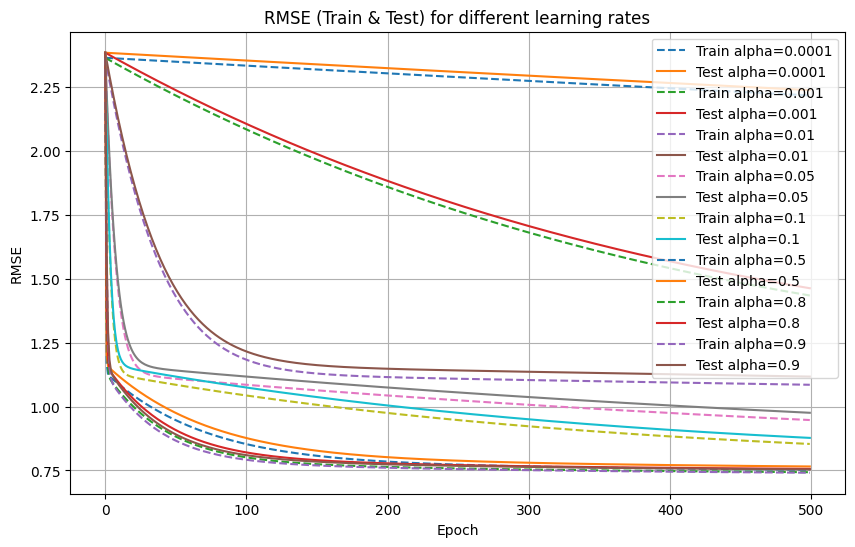

Best learning rate: 0.9


In [9]:
def h_w(x, w):
    return w[0] + w[1]*x
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9]
n_train = len(x_trian)
n_test=len(x_test)
n_features = x_trian.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trian @ w[1:]
        y_pred_test  = w[0] + x_test @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trian.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()
final_rmse_test = {alpha: rmse_test_dict[alpha][-1] for alpha in alphas}
best_alpha = min(final_rmse_test, key=final_rmse_test.get)
print(f"Best learning rate: {best_alpha}")

**RMSE Convergence over Epochs for Training and Test Sets at Optimal Learning Rate**

This code visualizes the performance of the gradient descent model for the selected best learning rate, which in this case is alpha = 0.9. The plot shows how the RMSE (Root Mean Squared Error) changes over each epoch for both the training and testing datasets. A dashed line represents the RMSE on the training data, while a solid line represents the RMSE on the test data. By plotting RMSE against epochs, this figure provides insight into the convergence behavior of the model, showing how quickly the error decreases and whether the model stabilizes over time. The grid, labels, and legend enhance readability, making it easier to interpret how the chosen learning rate affects the training process and generalization to unseen data. Overall, this visualization confirms that alpha = 0.9 enables fast and stable convergence, yielding the lowest RMSE on both training and test sets.

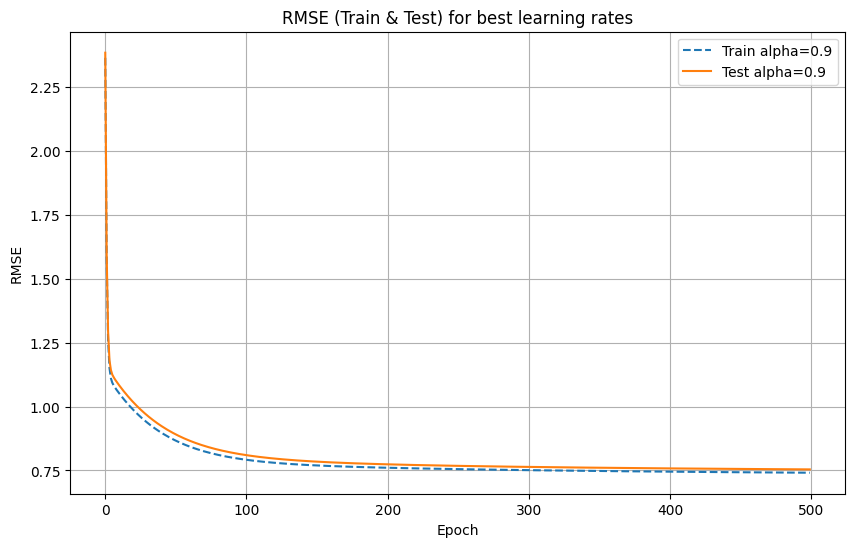

RMSE (GD, best LR) - Train: 0.7413053263585646
RMSE (GD, best LR) - Test: 0.7543371237880866


In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.9
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.9}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.9}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()
print(f"RMSE (GD, best LR) - Train: {rmse_train_dict[alpha][-1]}")
print(f"RMSE (GD, best LR) - Test: {rmse_test_dict[alpha][-1]}")

**Conclusion**

In this project, using the California Housing dataset, two approaches to linear regression were examined: the analytical (normal equation) method and gradient descent. Both methods achieved nearly identical errors in predicting housing values, with RMSE values around 0.72–0.73 for both training and testing datasets. This demonstrates that both approaches are effective in modeling the relationship between features and house values.

The advantage of the analytical method lies in its simplicity and computational efficiency for small to medium-sized datasets, whereas gradient descent is more scalable and can be applied to very large and complex datasets. Furthermore, the evaluation of different learning rates highlighted the importance of choosing an appropriate α, with a learning rate of 0.9 achieving the fastest and most stable convergence.

Regarding preprocessing, both Min-Max Scaler and Standard Scaler were tested. The results showed that Standard Scaler performed better, as transforming the data to have zero mean and unit variance allowed gradient descent to converge more quickly and stably. In contrast, Min-Max scaling was more sensitive to outliers and less effective with non-normal feature distributions, leading to lower accuracy. Therefore, in this project, standardization proved to be the most effective preprocessing method.